Simple quick update latest weather

In [37]:
# Tell matplotlib to plot in line
%matplotlib inline

# import pandas
import pandas

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()


In [38]:
infile = "../files/weather.csv"

!scp 192.168.0.127:Adafruit_Python_BMP/weather.csv ../files

weather.csv                                   100%   51KB  51.0KB/s   00:00    


In [39]:
""" assume it is csv and let pandas do magic

  index_col tells it to use the 'date' column in the data
  as the row index, plotting picks up on this and uses the
  date on the x-axis

  The *parse_dates* bit just tells it to try and figure out
  the date/time in the columne labeled 'date'.
"""
data = pandas.read_csv(infile, index_col='date', parse_dates=['date'])


### Last 24 hours:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b0ec8860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f41b0e61710>], dtype=object)

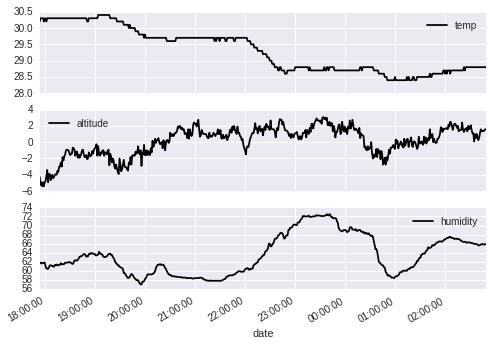

In [40]:
# reading is once a minute, so take last 24 * 60 readings
data[['temp', 'altitude', 'humidity']][-24*60:].plot(subplots=True)

### Last week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b0db92e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f41b0cef160>], dtype=object)

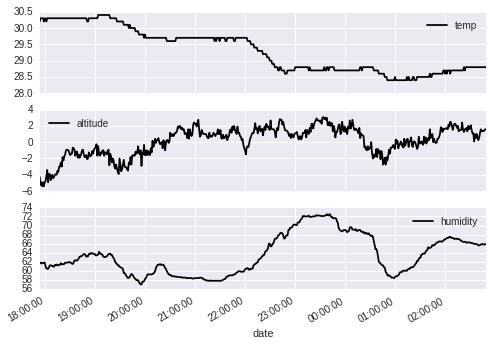

In [41]:
# reading is once a minute, so take last 7 * 24 * 60 readings
data[['temp', 'altitude', 'humidity']][-7*24*60:].plot(subplots=True)

## Look at all the data

In [42]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,29.304753,101323.574144,0.117595,101323.853612,63.471673,29.164829
std,0.670122,20.900518,1.776182,21.098848,4.387634,0.626189
min,28.400000,101286.000000,-5.410146,101289.000000,57.000000,28.299999
25%,28.700000,101307.000000,-0.999008,101307.000000,59.525000,28.600000
50%,29.250000,101319.000000,0.582799,101319.500000,62.500000,29.100000
75%,29.700000,101337.000000,1.498691,101338.000000,66.975000,29.500000
max,30.400000,101388.000000,3.080877,101394.000000,72.500000,30.200001


I currently have two temperature sensors:

* DHT22 sensor which gives temperature and humidity.
* BMP180 sensor which gives pressure and temperature.

The plot below shows the two temperature plots.

Both these sensors are currently in my study.  For temperature and humidity I would like to have some readings from outside.  If I can solder them to a phone jack then I can just run phone cable to where they need to be.

**Below** plots the current values from these sensors.  This is handy for calibration.

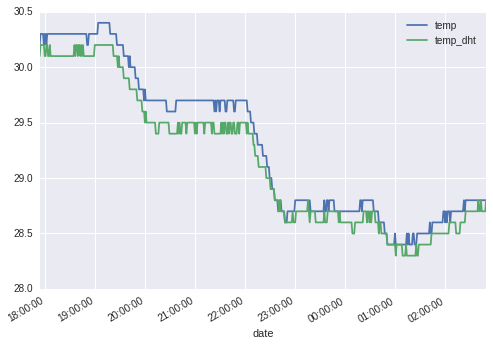

In [43]:
data[['temp', 'temp_dht']].plot()